<a href="https://colab.research.google.com/github/dwiaprlniptri/KCB-Batik/blob/main/batik_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# Visualisasi dan manipulasi data
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#style dari matplotlib
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Pembuatan plot dari model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocessing gambar
from keras.preprocessing.image import ImageDataGenerator

# Library untuk deeplearning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# Library untuk filter CNN
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf

# Untuk membaca dan mengolah gambar dari folder
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ini adalah direktori dari masing masing dataset yang digunakan
Z=[]
IMG_SIZE=150
batik_bali_DIR = '/content/drive/MyDrive/Dataset/batik-bali'
batik_keraton_DIR = '/content/drive/MyDrive/Dataset/batik-keraton'
batik_priangan_DIR = '/content/drive/MyDrive/Dataset/batik-priangan'
batik_sogan_DIR = '/content/drive/MyDrive/Dataset/batik-sogan'

In [ ]:
# ini merupakan fungsi untuk memberi label pada batik
def assign_label(img,batik_type):
    return batik_type

In [ ]:
# ini merupakan fungsi untuk membuat dataset dimana membaca semua gambar pada folder yang tersedia
X=[]

def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

In [ ]:
# Proses pemanggilan fungsi batik bali untuk di eksekusi
make_train_data('batik_bali',batik_bali_DIR)
print(len(X))

100%|██████████| 45/45 [00:01<00:00, 28.63it/s]

45


In [ ]:
# Proses pemanggilan fungsi batik keraton untuk di eksekusi
make_train_data('batik_keraton',batik_keraton_DIR)
print(len(X))

100%|██████████| 45/45 [00:01<00:00, 37.50it/s]

90


In [ ]:
# Proses pemanggilan fungsi batik priangan untuk di eksekusi
make_train_data('batik-priangan',batik_priangan_DIR)
print(len(X))

100%|██████████| 45/45 [00:00<00:00, 77.46it/s]

135


In [ ]:
# Proses pemanggilan fungsi batik sogan untuk di eksekusi
make_train_data('batik_sogan',batik_sogan_DIR)
print(len(X))

100%|██████████| 45/45 [00:01<00:00, 40.72it/s]

180


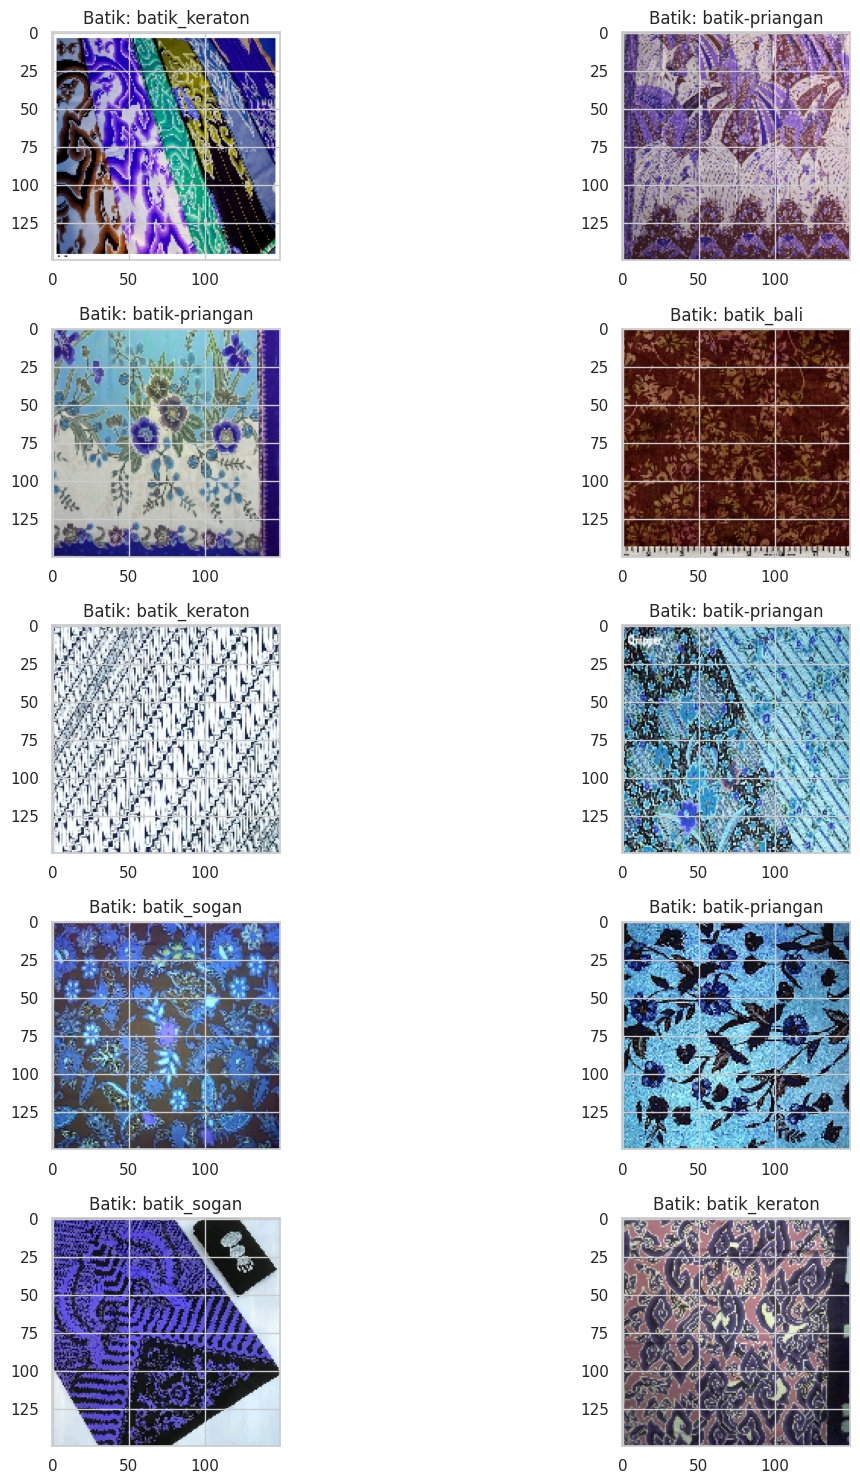

In [ ]:
# menampilkan gambar batik secara acak
import random as rn

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])

plt.tight_layout()

In [ ]:
# mengubah gambar menjadi bit
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255

In [ ]:
#membuat data tes dan data training
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
# digunakan agar setiap random tidak berubah hasil akhirnya
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
# model dari CNN yang memiliki 10jt
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# digunakan untuk mengatur batch size dan epochs pada setiap proses
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
# Menampilkan gambar secara acak untuk training data
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)


datagen.fit(x_train)

In [ ]:
# untuk mengatutr accuracy pada saat training data
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#proses menghitung jumlah parameter dalam filter
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 82944)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
# melakukan training data sejumlah epoch dan menghitung lost dan accuracy pada setiap epoch
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
4/4 [==============================] - 4s 331ms/step - loss: 2.1819 - accuracy: 0.3214 - val_loss: 2.1100 - val_accuracy: 0.2222
Epoch 2/50
4/4 [==============================] - 1s 152ms/step - loss: 1.5986 - accuracy: 0.2500 - val_loss: 1.4826 - val_accuracy: 0.2222
Epoch 3/50
4/4 [==============================] - 1s 249ms/step - loss: 1.3662 - accuracy: 0.2679 - val_loss: 1.3967 - val_accuracy: 0.1944
Epoch 4/50
4/4 [==============================] - 1s 304ms/step - loss: 1.3760 - accuracy: 0.2500 - val_loss: 1.3957 - val_accuracy: 0.1944
Epoch 5/50
4/4 [==============================] - 1s 318ms/step - loss: 1.3437 - accuracy: 0.3281 - val_loss: 1.3785 - val_accuracy: 0.4167
Epoch 6/50
4/4 [==============================] - 1s 176ms/step - loss: 1.3122 - accuracy: 0.3750 - val_loss: 1.5029 - val_accuracy: 0.3611
Epoch 7/50
4/4 [==============================] - 1s 175ms/step - loss: 1.2332 - accuracy: 0.4375 - val_loss: 1.7428 - val_accuracy: 0.3611
Epoch 8/50
4/4 [====

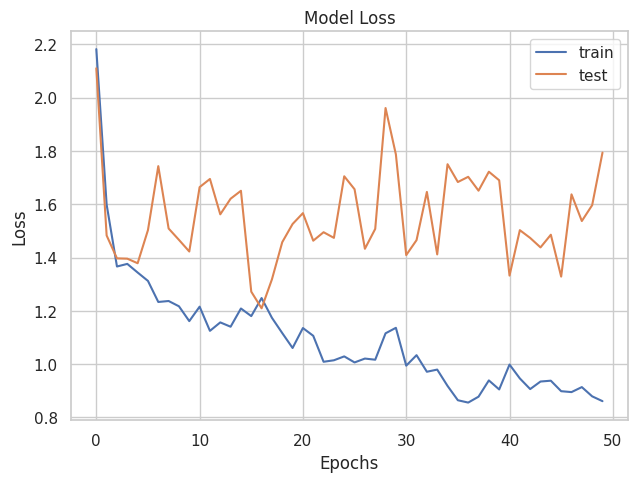

In [ ]:
# mengvisualisasikan model loss pada setiap epoch dalam bentuk grafik
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

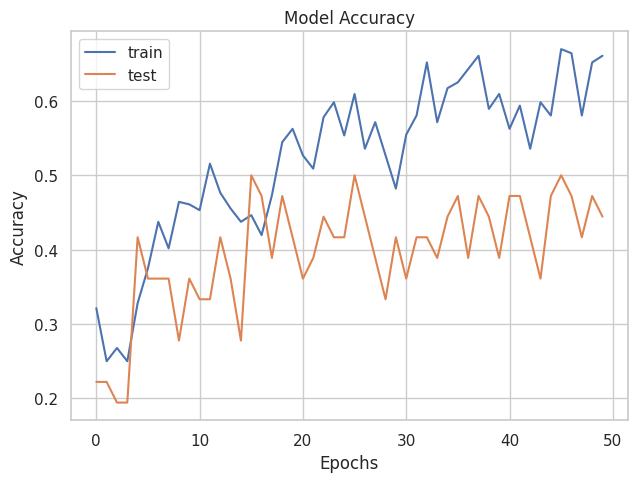

In [ ]:
# mengvisualisasikan model akurasi pada setiap epoch dalam bentuk grafik
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from keras.applications.resnet import ResNet50


In [ ]:
base_model = ResNet50(input_shape = (150,150,3), include_top = False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from keras.models import Model

X = Flatten()(base_model.output)
X = Dense(units=4, activation = 'sigmoid')(X)

#Final model
model2 = Model(base_model.input, X)

#compile the model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#include_top: Boolean, whether to include the fully-connected layer at the top, as the last layer of the network.
#summary
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
batch_size = 32
epochs = 200

# melakukan training data sejumlah epoch dan menghitung lost dan accuracy pada setiap epoch
History = model2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/200
4/4 [==============================] - 6s 764ms/step - loss: 0.8579 - accuracy: 0.2656 - val_loss: 0.6554 - val_accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 2s 538ms/step - loss: 0.6567 - accuracy: 0.3304 - val_loss: 0.6557 - val_accuracy: 0.2778
Epoch 3/200
4/4 [==============================] - 1s 341ms/step - loss: 0.6137 - accuracy: 0.2946 - val_loss: 0.6473 - val_accuracy: 0.2778
Epoch 4/200
4/4 [==============================] - 1s 253ms/step - loss: 0.6268 - accuracy: 0.3036 - val_loss: 0.5798 - val_accuracy: 0.2778
Epoch 5/200
4/4 [==============================] - 1s 208ms/step - loss: 0.5768 - accuracy: 0.3571 - val_loss: 0.5980 - val_accuracy: 0.3611
Epoch 6/200
4/4 [==============================] - 1s 170ms/step - loss: 0.5428 - accuracy: 0.4107 - val_loss: 0.5605 - val_accuracy: 0.4167
Epoch 7/200
4/4 [==============================] - 1s 194ms/step - loss: 0.5324 - accuracy: 0.4018 - val_loss: 0.5219 - val_accuracy: 0.4444
Epoch 8/200
4

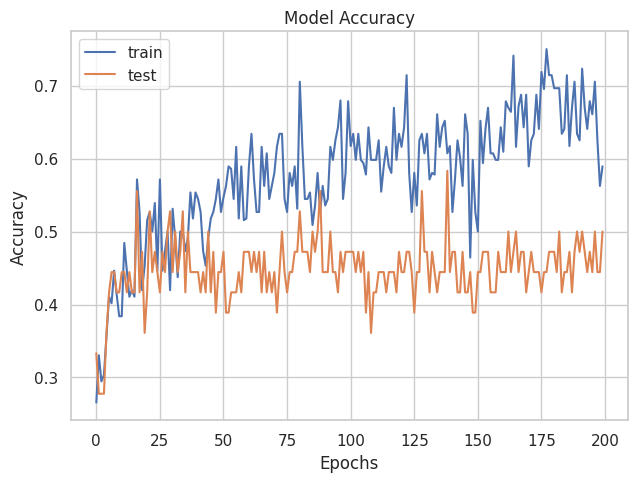

In [ ]:
# mengvisualisasikan model akurasi pada setiap epoch dalam bentuk grafik
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

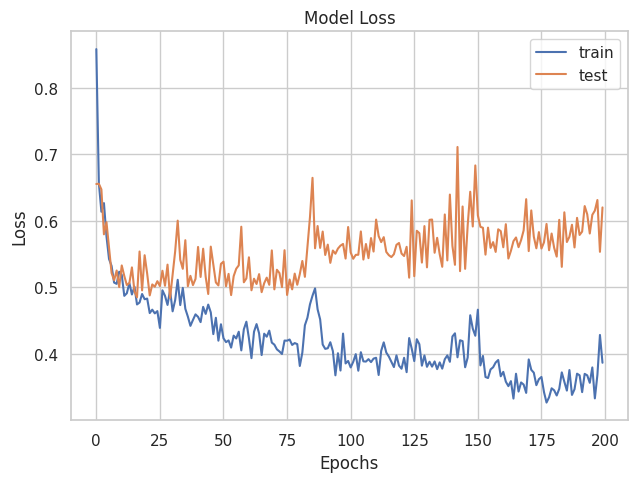

In [ ]:
# mengvisualisasikan model loss pada setiap epoch dalam bentuk grafik
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()